<a href="https://colab.research.google.com/github/100495802/G11.AA-495802-495702/blob/main/P1AA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# __MODELO DE PREDICCIÓN DEL ABANDONO DE EMPLEADOS DE UNA EMPRESA__
- Curso de Aprendizaje Automático 2024/25
- Grado en Ingeniería Informática - UC3M

__Autores__
- Alejandro López Sancho
- Javier Rosales Lozano

## 1. Introducción y carga de datos

### 1.1. Enunciado del proyecto

El objetivo del siguiente notebook es realizar la __construcción, medición y evaluación de un modelo que ayude a predecir los resultados de un problema real planteado, como es el número de abandonos dentro de una empresa, en función de las características de sus trabajadores__.

En este primer archivo de Jupyter Notebook encontraremos todo el proceso de EDA (Exploratory Data Analysis), selección de imputadores y escaladores, ajuste de hiperparámetros, evaluación de modelos, obtención de la tasa de aprendizaje y resolución de las preguntas establecidas en el enunciado del problema.

### 1.2. Repositorio Github y Dataset Inicial

El siguiente enlace redirige al [repositorio Github](https://github.com/JRosales04/employee-attrition-prediction) correspondiente al proyecto; los datos elegidos para la realización del proyecto corresponden con el estándar especificado para la realización del trabajo (suma de los dos últimos dígitos de uno de los NIAs del grupo de prácticas). En este caso, se ha elegido el NIA __100495802__, por lo que el [dataset inicial](data/attrition_availabledata_02.csv.gz) corresponderá al enlazado en la raíz del proyecto.

### 1.3. Carga de Datos

En caso de que se ejecute este Jupyter Notebook en un entorno de ejecución, se deberán instalar las dependencias dadas en el fichero [requirements.txt](requirements.txt), que se encuentra en la raíz del proyecto. El comando a ejecutar debe ser:

```bash
venv/Scripts/activate
pip install -r requirements.txt
```

A continuación, nos disponemos a la __carga de este conjunto de datos__:

In [49]:
import pandas as pd
datos = pd.read_csv("data/attrition_availabledata_02.csv.gz", compression="gzip", sep=",")

### 1.4. Conversión de variables categóricas

Debido a que la variable de salida _Attrition_ es una variable categórica, esto no va a ser funcional cuando se realicen algunas metodologías más adelante (GridSearch en HPO), por lo que será conveniente convertir los datos correspondientes a dicha variable a una codificación binaria.

In [50]:
datos['Attrition'] = datos['Attrition'].map({'Yes': 1, 'No': 0})

# 2. EDA Simplificado

Una vez cargado el dataset, se procede al estudio de éste, comentando y describiendo los distintos datos que existen en él.

### 2.1. Análisis general del dataset

Se empezará investigando, primeramente, el tamaño del dataset; esto se realiza con las propiedades `.shape` y `.size`, que determinan las dimensiones del conjunto de datos.

In [51]:
print(f"Tamaño del dataset: {datos.shape}")
print(f"Número total de elementos del dataset: {datos.size}")

Tamaño del dataset: (2940, 31)
Número total de elementos del dataset: 91140


Se observa que el tamaño del dataset es de __2940 filas (instancias) y 31 columnas (atributos)__. También se puede identificar el número total de elementos dentro del conjunto de datos.

A continuación, se muestran los atributos que existen en la base de datos usando el método `info()`, para identificar las diferentes columnas del dataset, además del tipo de dato y el número de instancias no nulas que contiene.

In [52]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   hrs                      2940 non-null   float64
 1   absences                 2940 non-null   int64  
 2   JobInvolvement           2940 non-null   int64  
 3   PerformanceRating        2940 non-null   int64  
 4   EnvironmentSatisfaction  2927 non-null   float64
 5   JobSatisfaction          2925 non-null   float64
 6   WorkLifeBalance          2911 non-null   float64
 7   Age                      2940 non-null   int64  
 8   BusinessTravel           2940 non-null   object 
 9   Department               2940 non-null   object 
 10  DistanceFromHome         2940 non-null   int64  
 11  Education                2940 non-null   int64  
 12  EducationField           2940 non-null   object 
 13  EmployeeCount            2940 non-null   int64  
 14  EmployeeID              

En la salida se aprecian las columnas que especifican para cada fila el nombre del atirbuto, el número de instancias no vacías y el tipo de dato de cada columna en los datos iniciales. Esto será útil para apreciar los tipos de datos que se analizan.

Se observa que algunas columnas cumplen con todas sus instancias como valores no nulos (N/A), mientras que __otras columnas no alcanzan el número total de filas obtenido anteriormente en las dimensiones del dataset (2940)__.

Por otro lado, el tipo de dato permite preveer qué columnas representan __atributos categóricos__ (`object`) y cuáles representan __atributos numéricos__ (`int64`, `float64`).

Para un resumen más detallado, hacemos uso de la propiedad `.describe()`:

In [53]:
datos.describe()

,hrs,absences,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,DistanceFromHome,Education,...,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
count,2940.000000,2940.000000,2940.000000,2940.000000,2927.000000,2925.000000,2911.000000,2940.000000,2940.000000,2940.000000,...,2926.000000,2940.000000,2940.0,2940.000000,2935.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000
mean,7.322768,12.706803,2.728571,3.154422,2.723266,2.746325,2.760907,36.861224,9.305102,2.906463,...,2.664388,15.187075,8.0,0.785034,11.363884,2.798639,7.095578,2.227891,4.191156,0.161224
std,1.335600,5.533199,0.716167,0.361414,1.096170,1.104612,0.713539,9.286733,8.201638,1.023254,...,2.495153,3.661275,0.0,0.851343,7.897032,1.304166,6.161878,3.274101,3.627734,0.367800
min,5.416880,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,18.000000,1.000000,1.000000,...,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.272786,8.000000,2.000000,3.000000,2.000000,2.000000,2.000000,30.000000,2.000000,2.000000,...,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000,0.000000
50%,7.032627,13.000000,3.000000,3.000000,3.000000,3.000000,3.000000,35.000000,7.000000,3.000000,...,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000,0.000000
75%,7.948416,17.000000,3.000000,3.000000,4.000000,4.000000,3.000000,43.000000,14.000000,4.000000,...,4.000000,18.000000,8.0,1.000000,16.000000,3.000000,10.000000,3.000000,7.000000,0.000000
max,10.937261,24.000000,4.000000,4.000000,4.000000,4.000000,4.000000,60.000000,29.000000,5.000000,...,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000,1.000000


En ésta ejecución de código identificamos algunas __métricas estadísticas__ acerca del conjunto de datos que abarcan los distintos atributos (como la media, la mediana, mínimos, máximos y rangos intercuartílicos). De momento, no es de gran ayuda, pero más adelante será útil.

Con los datos visualizados anteriormente en la ejecución de `.info()`, se procede a observar los valores de las variables más a fondo, haciendo hincapié en las distintas observaciones que se piden.

### 2.2. Variables numéricas y categóricas; variables con alta cardinalidad

En primer lugar, se diferencian los atributos que representan __valores categóricos__ de los que representan __valores numéricos__ (descartando la columna de la variable de salida, _Attrition_, la cual sabemos que es categórica):

In [54]:
numericas = datos.select_dtypes(include=['int64', 'float64']).columns.drop(['Attrition'])
print(numericas)

Index(['hrs', 'absences', 'JobInvolvement', 'PerformanceRating',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'Age',
       'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeID',
       'JobLevel', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


In [55]:
categoricas = datos.select_dtypes(include=["object"]).columns
print(categoricas)

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18'],
      dtype='object')


A continuación, de las __variables categóricas__, se buscan aquellas con una __alta cardinalidad__ en sus valores:

In [56]:
for columna in datos.select_dtypes(include=["object"]).columns:
    print(columna)
    print(datos[columna].unique())

BusinessTravel
['Travel_Frequently' 'Non-Travel' 'Travel_Rarely']
Department
['Research & Development' 'Sales' 'Human Resources']
EducationField
['Life Sciences' 'Medical' 'Other' 'Technical Degree' 'Marketing'
 'Human Resources']
Gender
['Male' 'Female']
JobRole
['Laboratory Technician' 'Healthcare Representative' 'Research Scientist'
 'Sales Representative' 'Manufacturing Director' 'Sales Executive'
 'Research Director' 'Human Resources' 'Manager']
MaritalStatus
['Married' 'Divorced' 'Single']
Over18
['Y']


__En este estudio se considera con cardinalidad elevada un atributo con un rango de posibles opciones mayor de 4__.

En este caso, las columnas con alta cardinalidad son _EducationField_ y _JobRole_.

Por otro lado, se podrían considerar los atributos _BusinessTravel_, _Gender_ y _MaritalStatus_ como ordinales (Frío, Templado, Caliente), aunque para el preprocesado serán tratados de igual manera que los atributos categóricos, por lo que mantenemos estas variables en el mismo conjunto.

### 2.3. Variables nulas

En el preprocesado de datos, es importante determinar qué instancias contienen __valores nulos__, y el número de instancias de este tipo en cada columna. Esto lo comprobamos con la propiedad `.isnull()`:

In [57]:
nulos = datos.isnull().sum()
nulos[nulos > 0]

EnvironmentSatisfaction    13
JobSatisfaction            15
WorkLifeBalance            29
NumCompaniesWorked         14
TotalWorkingYears           5
dtype: int64

Gracias al resultado de esta ejecución se sabe que en el dataset se aprecian __cinco columnas con valores nulos__ en sus filas: _EnvironmentSatisfaction, JobSatisfaction, WorkLifeBalance, NumCompaniesWorked, TotalWorkingYears_. Teniendo en cuenta que en total hay 2940 filas en la base de datos, se pueden calcular fácilmente la media de datos vacíos por columna.

Sabiendo de qué tipo era cada variable, se concluye en que __todas estas columnas corresponden con variables numéricas__, y es posible pensar desde ahora en posibilidades para trabajar con estos valores vacíos.

### 2.4. Variables de identificación (ID)

Una vez analizado todo lo anterior, se procede a la búsqueda de columnas que puedan actuar como identificadores en el dataset inicial. A simple vista, una posible opción sería _EmployeeID_, aunque es mejor comprobarlo empleando el método `.nunique()`:

In [58]:
for columna in datos.columns:
    if datos[columna].nunique() == len(datos):
        print(f"La columna '{columna}' es un posible identificador único.")

La columna 'EmployeeID' es un posible identificador único.


In [59]:
datos.drop(columns="EmployeeID")

,hrs,absences,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,BusinessTravel,Department,...,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,10.060048,6,3,4,2.0,4.0,1.0,31,Travel_Frequently,Research & Development,...,Y,23,8,1,7.0,5,2,2,2,1
1,9.437671,2,2,3,3.0,4.0,3.0,33,Non-Travel,Research & Development,...,Y,13,8,0,7.0,6,6,1,2,0
2,7.900932,20,3,4,3.0,4.0,3.0,35,Travel_Rarely,Research & Development,...,Y,22,8,1,10.0,4,10,7,7,1
3,7.193853,19,4,3,4.0,2.0,3.0,28,Travel_Rarely,Research & Development,...,Y,15,8,0,1.0,1,1,0,0,0
4,6.979201,8,3,3,2.0,4.0,2.0,31,Travel_Rarely,Research & Development,...,Y,12,8,1,10.0,2,8,7,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935,9.400915,3,2,3,4.0,NaN,3.0,42,Travel_Rarely,Sales,...,Y,14,8,1,10.0,2,9,7,8,0
2936,6.934386,9,2,3,3.0,1.0,2.0,49,Travel_Rarely,Research & Development,...,Y,11,8,1,16.0,3,15,5,11,0
2937,9.106920,15,3,3,2.0,4.0,2.0,36,Travel_Rarely,Sales,...,Y,13,8,0,18.0,2,18,4,11,0
2938,6.532645,6,4,3,1.0,3.0,2.0,30,Travel_Rarely,Sales,...,Y,16,8,1,5.0,2,5,0,4,0


Estos datos no aportan nada al estudio, por lo que será conveniente eliminarlos del conjunto de datos.

### 2.5. ¿Problema desbalanceado?

Con el planteamiento completo, se puede intuir que se trata de un __problema de clasificación__. Además, la variable _Attrition_ es la que determinará si un empleado es propenso a abandonar su puesto de trabajo en función del resto de columnas.

Sin embargo, todavía __no es posible corroborar si se trata de un problema de clasificación desbalanceado__. Este hallazgo será muy importante, ya que definirá la manera en la que realizan las particiones para entrenar, validar y evaluar el modelo.

Para averiguarlo, se usa el método `.value_counts()` en la variable de salida:

In [60]:
datos["Attrition"].value_counts()

Attrition
0    2466
1     474
Name: count, dtype: int64

La salida de la ejecución muestra el conteo de datos de dicha columna, lo que demuestra que __se trata de un problema desbalanceado__ hacia el valor "no", siendo más del 80% de las clasificaciones de este tipo.

Esto va a influir en la manera en la que se crean los modelos de aprendizaje, ya que es un deber establecer los pesos balanceados (con `class_weight=balanced`). De esta manera, se dará prioridad a las instancias de la clase minoritaria, y se obtendrá una tasa de acierto más fiable.

## 3. Metodología de trabajo

Una vez terminada la parte de análisis del conjunto de datos, se saca en claro que:

- Se trata de un problema de clasificación desbalanceado.
- Existen tanto variables numéricas como variables categóricas en el dataset.
- Algunas de las instancias contienen valores vacíos.

Con el estudio del dataset inicial finalizado, se procede a especificar la realización del trabajo. En este apartado se describe __cómo se va a construir y evaluar el modelo final__.

### 3.1. Planificación del entrenamiento

- __División de los datos:__

  Para realizar la evaluación del modelo, lo primero que se hace es dividir el conjunto de datos en dos particiones: una de entrenamiento (_train_) y otra de evaluación (_test_). Se usará la metodología __Holdout__ para invertir 2/3 de los datos en la parte de entrenamiento del modelo, y el resto para evaluar el modelo final del entrenamiento.

- __Preprocesado de datos:__

  Antes de efectuar la fase de entrenamiento, primero se deben ajustar unas métricas relacionadas con el dataset: primero se ha de elegir el método de __imputación__ y __escalado__ de atributos que genera un mejor rendimiento de los datos. Para esta medición, se emplea KNN con los hiperparámetros por defecto, modificando el escalado con varios formatos (_Standard, MinMax, Robust_) y también el tratado de datos vacios o imputación de datos usando otras métricas (_Media, Mediana_, al tratarse de atributos numéricos). Por último, en todos los casos, se evaluan los modelos mediante __3-Fold crossvalidation__. En esta parte se busca obtener el Escaler-Imputer que de el mejor rendimiento de la partición de entrenamiento.

- __Creación de Modelos y Ajuste de hyperparametro HPO:__

  Una vez hecho lo anterior, comienza la búsqueda del mejor modelo; se construirán una serie de modelos basándose en las metodologías aprendidas durante el curso (KNN, Árboles de Decisión, Modelos Lineales y SVMs) realizando el __ajuste de hiperparámetros__ (HPO) para la elección del modelo que mejor se ajuste a los datos, procurando evitar cualquier data-leakage y overfitting/underfitting.

- __Evaluación del modelo final de entrenamiento:__

  Finalmente, tras encontrar la mejor alternativa, se emplea el conjunto de test anteriormente mencionado para obtener una __estimación y rendimiento a futuro del modelo__. Esta fase es lo que se conoce como la evaluación del modelo

  Además de esto, se miden otras métricas de precisión y accuracy del modelo de entrenamiento usando la partición de test: TPR, TNR y precisión de las clases positivas y negativas. Para ello, se construye una __matriz de confusión__.

### 3.2. Entrenamiento y evaluación del modelo final

Los pasos anteriores preceden al entrenamiento del modelo final, el cual se entrena con el dataset completo (entrenamiento + test) y se evalua realizando predicciones con un conjunto de datos de competición aparte.

La implementación de éste apartado se realiza en el [siguiente Jupyter Notebook](employee-attrition-competition.ipynb) de la raíz del proyecto.

## 4. Modelos Básicos: KNN y Árboles de Decisión. Imputación, escalado y ajuste de hiperparámetros

Según el plan establecido, el primer paso es realizar el escalado/imputación de los datos, de manera que sea el modelo el que se ajuste a éstos. Para ello, es necesario la importación de las siguientes librerías de _SkLearn_ (además de la librería _time_ para medir la eficiencia del modelo):

In [61]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, RobustScaler, StandardScaler

import time

### 4.1. División de los datos: particiones de entrenamiento y test

Para establecer la división de los datos, se hace uso de la función `train_test_split()`, para realizar la metodología __Holdout__ y dividir las particiones de entrenamiento y test en la proporción correspondiente (2/3, 1/3).

También se inicializa el atributo `random_state` con un valor predefinido, ya que garantiza que se mantenga el mismo conjunto de datos de partición de entrenamiento y de test en todas las ejecuciones del notebook. En el caso de inicializarlo a `None`, se realizaría al azar el entrenamiento del modelo en cada ejecución, ya que hay algunas métricas (como en KNN) que no se basan en estadísticas globales de los datos, y esto puede variar el resultado en cada una de ellas.

El valor elegido será `random_state=100495702` (segundo NIA).

Una vez especificado esto, se procede a la partición de los datos.

In [62]:
X = datos.drop("Attrition", axis=1)
y = datos["Attrition"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=100495702)

### 4.2. Escalado e imputación de la partición de entrenamiento; creación del preprocesador

Ya divididos los datos, se busca el modelo que mejor se adapte a la partición de entrenamiento según el tipo de imputación y escalado de datos. Para los escaladores, se los tres escaladores estudiados para KNN: __MinMax (to 0-1 range), Estandarización y RobustScaler__; mientras que para los imputadores, se emplean los especificados en el enunciado: __la media y la mediana__ de las variables de la misma instancia (__imputación univariante__).

También se empleará como clasificador KNN y como métrica para la puntuación de cada imputer/scaler __balanced accuracy__:

In [63]:
# Lista de escaladores e imputadores
Scalers = [StandardScaler(), MinMaxScaler(), RobustScaler()]
Imputers = [SimpleImputer(strategy="mean"), SimpleImputer(strategy="median")]

# Variables para almacenar el mejor modelo y su puntuación
mejor_scaler = None
mejor_imputer = None
mejor_score = 0

# Defiinimos el transformer para columnas categóricas
categorical_transformer = Pipeline(steps=[
  ("encoder", OneHotEncoder(handle_unknown="ignore"))
  ])

# Iteramos sobre los escaladores
for scaler in Scalers:

  # Iteramos sobre los imputadores
  for imputer in Imputers:

    # Pipeline para las columnas numéricas
    numerical_transformer = Pipeline(steps=[
      ("imputer", imputer), ("scaler", scaler)
      ])

    # Preprocesador combinado
    preprocessor = ColumnTransformer(transformers=[
      ("num", numerical_transformer, numericas),
      ("cat", categorical_transformer, categoricas)
      ])

    # Pipeline completo con clasificador (se utiliza KNN para clasificar)
    pipeline = Pipeline(steps=[
      ("preprocessor", preprocessor),
      ("classifier", KNeighborsClassifier())
      ])

    # Evaluación del modelo con 3-fold cross-validation (se utiliza balanced_accuracy como métrica)
    score = cross_val_score(pipeline, X_train, y_train,
                            cv=3, scoring="balanced_accuracy").mean()

    # Comparamos con el mejor modelo
    if score > mejor_score:
      mejor_score = score
      mejor_scaler = scaler
      mejor_imputer = imputer

    # Imprimimos los resultados de cada combinación
    print(f"Scaler: {scaler}, Imputer: {imputer}, Score: {score}")

# Obtenemos el mejor scaler/imputer y su score
print(f"\nMejor Scaler: {mejor_scaler}, Mejor Imputer: {mejor_imputer}, Mejor Score: {mejor_score}")

Scaler: StandardScaler(), Imputer: SimpleImputer(), Score: 0.5815283777377639
Scaler: StandardScaler(), Imputer: SimpleImputer(strategy='median'), Score: 0.5784622167293647
Scaler: MinMaxScaler(), Imputer: SimpleImputer(), Score: 0.5922876108796686
Scaler: MinMaxScaler(), Imputer: SimpleImputer(strategy='median'), Score: 0.590604109196167
Scaler: RobustScaler(), Imputer: SimpleImputer(), Score: 0.6069585667058591
Scaler: RobustScaler(), Imputer: SimpleImputer(strategy='median'), Score: 0.6089429107479649

Mejor Scaler: RobustScaler(), Mejor Imputer: SimpleImputer(strategy='median'), Mejor Score: 0.6089429107479649


Observando los datos se concluye que el mejor __método de escalado__ es `RobustScaler()`, el cual es particularmente útil cuando existen valores atípicos en los datos, ya que transforma los atributos usando la mediana y el rango intercuartílico; mientras que el __mejor método de imputación (univariante)__ es `SimpleImputer(strategy="mean")`, el cual reemplaza los valores faltantes con la media de cada atributo. Esta estrategia es muy común y sobretodo adecuada cuando los datos son aproximadamente simétricos.

Estos valores quedan reservados en las variables locales `mejor_scaler` y `mejor_imputer`

A continuación, se define un __preprocesador__ con los valores mencionados, que se usa en los distintos modelos a lo largo del cuaderno:

In [64]:
# Definimos el codificador de variables categóricas
categorical_transformer = Pipeline(steps=[
       ("encoder", OneHotEncoder(handle_unknown="ignore"))
       ])

# Definimos el mejor escalador e imputador obtenidos anteriormente
numerical_transformer = Pipeline(steps=[
       ("imputer", mejor_imputer),
       ("scaler", mejor_scaler)
       ])

# Preprocesador combinado para columnas numéricas y categóricas
preprocesador = ColumnTransformer(transformers=[
       ("num", numerical_transformer, numericas),
       ("cat", categorical_transformer, categoricas)
       ])

Este preprocesador queda almacenado en la variable `preprocesador`.

Finalmente, se instancia un diccionario de Python que almacenará el modelo de clasificación junto con los resultados obtenidos en puntuación y tiempo de ejecución. Este diccionario se declarará en la variable `resultados`:

In [65]:
# Creamos un diccionario para almacenar los resultados de los modelos
resultados = {}

### 4.3. Modelos iniciales con hiperparámetros por defecto

Una vez obtenidos los métodos de escalado y de imputación óptimos, junto con el preprocesador de los datos preparados, se procede a la siguiente fase. Antes de realizar el ajuste de hiperparámetros, primeramente se deben estudiar los modelos de KNN y Árboles de Decisión con los hiperparámetros por defecto:

In [66]:
# Definimos los clasificadores KNN y DecisionTreeClassifier
clasificadores = [KNeighborsClassifier(), DecisionTreeClassifier(random_state=100495702)]

# Iteramos sobre los clasificadores
for clasificador in clasificadores:

    # Configuramos el clasificador para que use pesos balanceados si es un árbol de decisión
    if isinstance(clasificador, DecisionTreeClassifier):
           clasificador.set_params(class_weight="balanced")

    # Pipeline completo con clasificador
    pipeline = Pipeline(steps=[
           ("preprocessor", preprocesador),
           ("classifier", clasificador)
           ])

    # Medimos el tiempo de entrenamiento del modelo
    start_time = time.time()
    scores = cross_val_score(pipeline, X_train, y_train, cv=3, scoring='balanced_accuracy')
    end_time = time.time()

    # Imprimimos los resultados
    print("Modelo", clasificador.__class__.__name__)
    print("Puntuación de validación cruzada:", scores.mean())
    print("Tiempo de ejecución:", end_time - start_time, "segundos\n")

    # Almacenamos los resultados en el diccionario
    resultados[clasificador.__class__.__name__] = {
       "modelo": clasificador,
       "puntuacion": scores.mean(),
       "tiempo_ejecucion": end_time - start_time,
       "hiperparametros": None
       }


Modelo KNeighborsClassifier
Puntuación de validación cruzada: 0.6089429107479649
Tiempo de ejecución: 0.08897876739501953 segundos

Modelo DecisionTreeClassifier
Puntuación de validación cruzada: 0.7513219652208821
Tiempo de ejecución: 0.11280250549316406 segundos



A priori, el modelo KNN es considerablemente menos eficiente que los árboles de decisión; y la diferencia de coste computacional no es muy grande, por lo que no es realmente útil comparar por esta métrica todavía.

### 4.4. Ajuste de hiperparámetros (HPO)

A continuación, se usa el método `GridSearch()` para encontrar el mejor ajuste de hiperparámetros para cada uno de los dos modelos.

Se consideran los siguientes hiperparámetros para el modelo __KNN__:
- __Grado de clasificación (_k_)__: representa el número de datos de entrenamiento más cercanos a la instancia a evaluar que se consideran para determinar la predicción del modelo
- __Métricas de distancia entre instancias vecinas__: distancia euclídea, distancia de Manhattan y distancia de Minkowski

Por otro lado, los hiperparámetros a medir para los __arboles de decisión__ son los siguientes:
- __Profundidad máxima del árbol (_max_depth_)__: es el máximo de profundidad que se permite para la creación del árbol. Esto influye en las instancias agrupadas en cada nodo hoja.
- __Número mínimo de instancias (_min_samples_split_)__: se condiciona el número mínimo de instancias para poder realizar una patición de un nodo intermedio.
- __Criterio de impureza__: se varía el cálculo para determinar qué atributos influyen más en la clasificación (_entropía_ e _impureza de Gini_).

Es posible muchos más hiperparámetros que harían este proceso mucho más efectivo, pero también se busca reducir el tiempo de ejecución. Por lo tanto, bastará con los hiperparámetros fundamentales que estimen un modelo con un mayor rendimiento.

Además, para evitar que se ejecute durante más tiempo, se reparte el trabajo entre todos los kernels de la máquina con `n_jobs=-1`.

In [67]:
# Iteramos sobre los clasificadores
for clasificador in clasificadores:

    # Definimos una pipeline con el preprocesador y el clasificador
    pipeline = Pipeline(steps=[
           ("preprocessor", preprocesador),
           ("classifier", clasificador)
           ])

    # Definimos la rejilla de hiperparámetros para cada clasificador
    if isinstance(clasificador, KNeighborsClassifier):
            param_grid = {
                'classifier__n_neighbors': [3, 5, 7, 9, 11],
                'classifier__metric': ['euclidean', 'manhattan', 'minkowski']
            }
    elif isinstance(clasificador, DecisionTreeClassifier):
            # Configuramos el clasificador para que use pesos balanceados si es un árbol de decisión
            clasificador.set_params(class_weight="balanced")
            param_grid = {
                'classifier__max_depth': [5, 10, 15, None],
                'classifier__min_samples_split': [2, 5, 10],
                'classifier__criterion': ['gini', 'entropy'],
            }

    # Entrenamos el modelo con GridSearchCV para encontrar los mejores hiperparámetros
    grid_search = GridSearchCV(pipeline, param_grid, cv=3, n_jobs=-1, scoring='balanced_accuracy')

    # Medimos el tiempo del entrenamiento del modelo
    start_time = time.time()
    grid_search.fit(X_train, y_train)
    end_time = time.time()

    # Mostrar los mejores hiperparámetros
    print("Modelo", clasificador.__class__.__name__, "con HPO")
    print("Mejores parámetros:", grid_search.best_params_)
    print("Mejor puntuación:", grid_search.best_score_)
    print("Tiempo de ejecución:", end_time - start_time, "segundos\n")

    # Guardamos el mejor modelo en la instancia del diccionario con HPO
    resultados[clasificador.__class__.__name__+"_HPO"] = {
        "modelo": clasificador,
        "puntuacion": grid_search.best_score_,
        "tiempo_ejecucion": end_time - start_time,
        "hiperparametros": grid_search.best_params_
    }

Modelo KNeighborsClassifier con HPO
Mejores parámetros: {'classifier__metric': 'manhattan', 'classifier__n_neighbors': 3}
Mejor puntuación: 0.6636557299012172
Tiempo de ejecución: 0.49481749534606934 segundos

Modelo DecisionTreeClassifier con HPO
Mejores parámetros: {'classifier__criterion': 'entropy', 'classifier__max_depth': 10, 'classifier__min_samples_split': 10}
Mejor puntuación: 0.7970763510474702
Tiempo de ejecución: 0.6346337795257568 segundos



Se observan, a continuación, las dos mejores combinaciones de hiperparámetros respecto a cada modelo:

- En KNN, elegir las tres instancias más cercanas según la distancia euclídea resulta ser más efectivo que cualquier otra combinación; sin embargo, el tiempo de ejecución relativamente alto. Esto puede deberse a datos ruidosos, y a que la fase clave del procedimiento viene en la predicción (ya que en KNN, el entrenamiento son los propios datos del modelo, por eso es un algoritmo "perezoso").
- Por otro lado, para árboles de decisión, medir la pureza de un nodo con la impureza de Gini parece ser más efectivo que el cálculo de la entropía; se establece a 15 la profundidad máxima del árbol (lo que significa que existen muchas particiones/ramas), y a 5 el número mínimo de instancias de un nodo hoja.

En cualquier circunstancia, se ve claro que __el clasificador de árboles de regresión es más efectivo y más eficiente que el clasificador KNN__.

### 4.5. Modelo Dummy

El __modelo Dummy__ es el modelo que clasifica todas las instancias a la clase mayoritaria, lo cual es inefectivo para el problema, ya que causará un modelo con muy baja tasa de acierto.

Sin embargo, saber las métricas de este modelo puede ayudar a comprobar que los modelos creados anteriormente sean eficientes. Los modelos obtenidos anteriormente se considerarán como válidos si superan la tasa de acierto de este modelo.

En este caso, no se realiza ajuste de hiperparámetros, ya que la creación de este modelo es meramente orientativa:

In [68]:
# Definimos el clasificador DummyClassifier
dummy_clf = DummyClassifier(strategy='most_frequent')

# Medimos el tiempo del entrenamiento del modelo
start_time = time.time()
score = cross_val_score(dummy_clf, X_train, y_train, cv=3, scoring='balanced_accuracy').mean()
end_time = time.time()

# Mostramos los resultadosd
print("Modelo DummyClassifier")
print("Mejor puntuación:", score)
print("Tiempo de ejecución:", end_time - start_time, "segundos\n")

# Guardamos el modelo en el diccionario
resultados[dummy_clf.__class__.__name__] = {
    "modelo": dummy_clf,
    "puntuacion": score,
    "tiempo_ejecucion": end_time - start_time,
    "hiperparametros": None
}

Modelo DummyClassifier
Mejor puntuación: 0.5
Tiempo de ejecución: 0.016301393508911133 segundos



Como es obvio, el modelo Dummy obtendrá una __tasa de aciertos del 50%__, lo cual es inferior a la puntuación obtenida en los modelos anteriores. Esto permite confirmar que los modelos anteriores son correctos.


### 4.6. Comparativa de modelos

Para comparar las distintas combinaciones de hiperparámetros, se crean los modelos simples de cada tipo con dichas combinaciones, y luego se dispondrán gráficos para comprobar que los resultados anteriores son correctos.

Para la creación de gráficos, se preciso importat la librería `matplotlib`:

In [69]:
import matplotlib.pyplot as plt

A continuación, se comparan las diferentes combinaciones de hiperparámetros para los modelos KNN:

In [70]:
# Almacenamiento de los resultados
resultados_knn = {}

# Definimos los hiperparámetros para el clasificador KNeighborsClassifier
n_vecinos = [3, 5, 7, 9, 11]
metricas = ['euclidean', 'manhattan', 'minkowski']

# Creamos los modelos
for n in n_vecinos:
    for m in metricas:
        # Definimos el clasificador KNeighborsClassifier con los hiperparámetros
        knn = KNeighborsClassifier(n_neighbors=n, metric=m)
        # Definimos la pipeline con el preprocesador y el clasificador
        pipeline = Pipeline(steps=[
           ("preprocessor", preprocesador),
           ("classifier", knn)
           ])
        # Medimos el tiempo del entrenamiento del modelo
        start_time = time.time()
        scores = cross_val_score(pipeline, X_train, y_train, cv=3, scoring='balanced_accuracy')
        end_time = time.time()
        # Almacenamos los resultados en el diccionario	
        resultados_knn[knn.__class__.__name__+f"_{n}_{m}"] = {
            "modelo": knn,
            "puntuacion": scores.mean(),
            "tiempo_ejecucion": end_time - start_time,
            "hiperparametros": {"n_neighbors": n, "metric": m}
        }
        # Imprimimos los resultados
        # print(f"Modelo KNeighborsClassifier (n_neighbors={n}, metric={m})")
        # print("Puntuación de validación cruzada:", scores.mean())
        # print("Tiempo de ejecución:", end_time - start_time, "segundos\n")

El siguiente plot muestra los resultados de los modelos KNN creados:

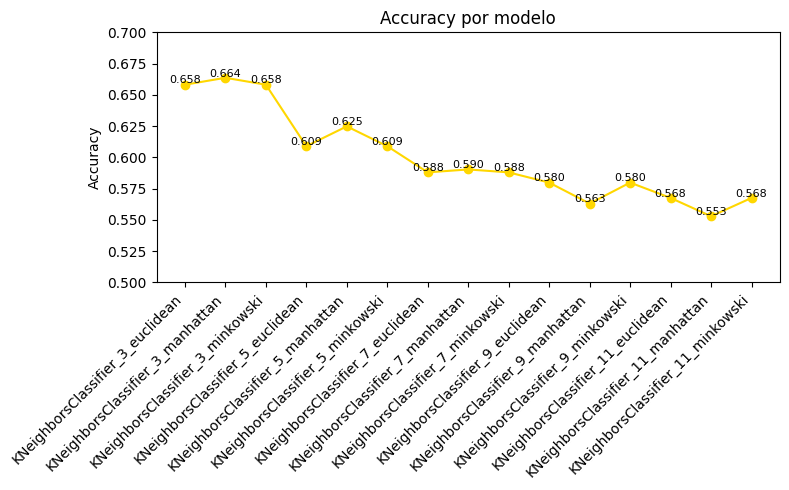

In [71]:
# Listamos los modelos y sus puntuaciones
modelos = list(resultados_knn.keys())
accuracies = [resultados_knn[modelo]["puntuacion"] for modelo in modelos]

# Creamos el gráfico
plt.figure(figsize=(8, 5))
plt.plot(modelos, accuracies, marker='o', linestyle='-', color='gold')
plt.title('Accuracy por modelo')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')

# Ajustamos la escala para notar las diferencias
plt.ylim(0.5, 0.7)

# Escribimos el valor encima de cada punto
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.001, f"{acc:.3f}", ha='center', fontsize=8)

# Mostramos el gráfico
plt.tight_layout()
plt.show()

Visualizando el gráfico, se comprueba que el ajuste de hiperparámetros elegido por la metodología GridSearch ha sido correcta, ya que en términos de tasa de aciertos la combinación obtenida coincide en ambos casos.

También se extrae la conclusión de que __cuantas más instancias vecinas se estudian para una nueva instancia, más sobreajuste se produce__; y por tanto peores resultados se obtienen.

A continuación, se hace lo mismo, pero para los hiperparametros de los árboles de decisión:

In [72]:
# Almacenamiento de los resultados
resultados_dec_tree = {}

# Definimos los hiperparámetros para el clasificador DecisionTreeClassifier
max_depths = [5, 10, 15, None]
min_samples_splits = [2, 5, 10]
criterions = ['gini', 'entropy']

# Creamos los modelos
for depth in max_depths:
    for min_samples in min_samples_splits:
        for criterion in criterions:
            # Definimos el clasificador DecisionTreeClassifier con los hiperparámetros
            d_tree = DecisionTreeClassifier(max_depth=depth, min_samples_split=min_samples, criterion=criterion, random_state=100495702, class_weight="balanced")
            # Definimos la pipeline con el preprocesador y el clasificador
            pipeline = Pipeline(steps=[
               ("preprocessor", preprocesador),
               ("classifier", d_tree)
               ])
            # Medimos el tiempo del entrenamiento del modelo
            start_time = time.time()
            scores = cross_val_score(pipeline, X_train, y_train, cv=3, scoring='balanced_accuracy')
            end_time = time.time()
            # Almacenamos los resultados en el diccionario	
            resultados_dec_tree[d_tree.__class__.__name__+f"_{depth}_{min_samples}_"+criterion] = {
                "modelo": d_tree,
                "puntuacion": scores.mean(),
                "tiempo_ejecucion": end_time - start_time,
                "hiperparametros": {"max_depth": depth, "min_samples_split": min_samples, "criterion": criterion}
            }
            # Imprimimos los resultados
            # print(f"Modelo DecisionTreeClassifier (max_depth={depth}, min_samples_split={min_samples}, criterion={criterion})")
            # print("Puntuación de validación cruzada:", scores.mean())
            # print("Tiempo de ejecución:", end_time - start_time, "segundos\n")

El siguiente gráfico mostrará los resultados obtenidos:

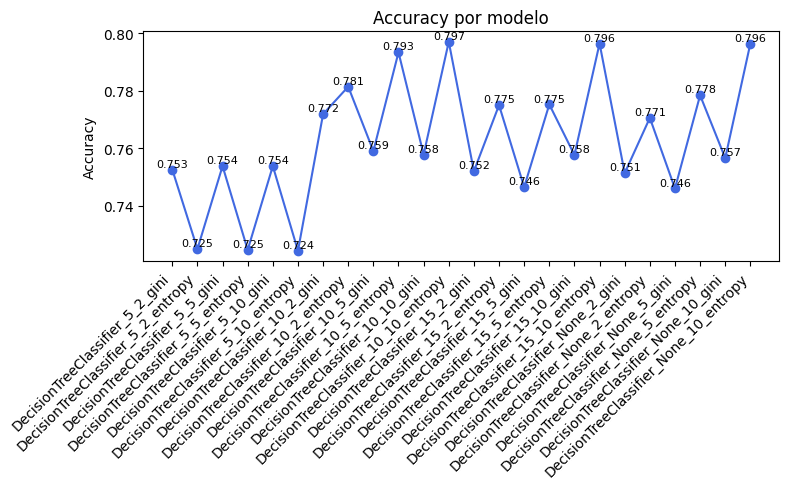

In [73]:
# Listamos los modelos y sus puntuaciones
modelos = list(resultados_dec_tree.keys())
accuracies = [resultados_dec_tree[modelo]["puntuacion"] for modelo in modelos]

# Creamos el gráfico
plt.figure(figsize=(8, 5))
plt.plot(modelos, accuracies, marker='o', linestyle='-', color='royalblue')
plt.title('Accuracy por modelo')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')

# Escribimos el valor encima de cada punto
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.001, f"{acc:.3f}", ha='center', fontsize=8)

# Mostramos el gráfico
plt.tight_layout()
plt.show()

De la misma manera que anteriormente, los resultados obtenidos coinciden. Observando la gráfica se concluye en que __las profundidades máximas altas producen mejores resultados que las bajas__, debido a que las ramas del árbol se diferencian mejor (una profundidad pequeña puede producir el subajuste de los datos).

A continuación, se muestra el balance de resultados entre los mejores modelos de éste apartado:

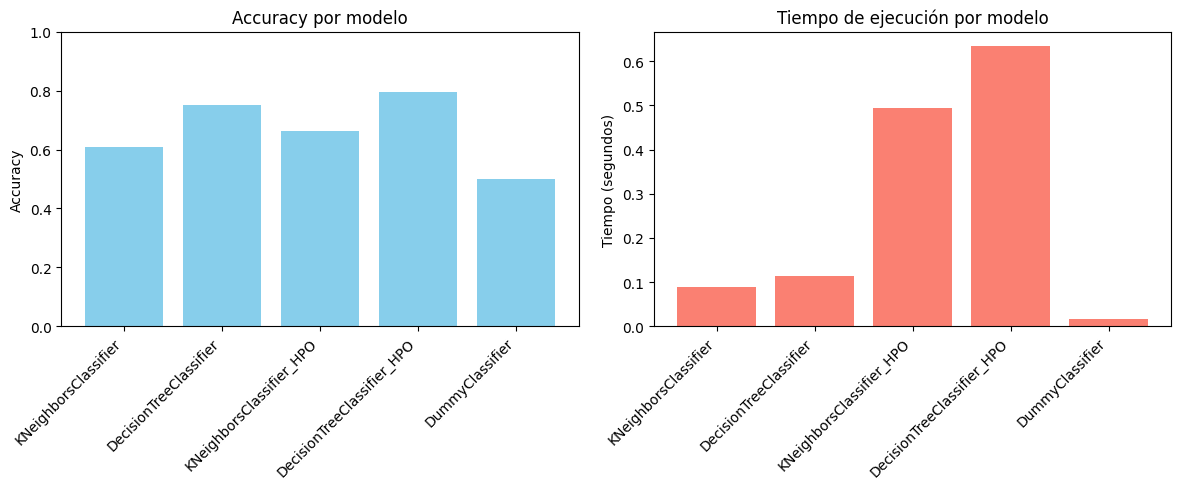

In [74]:
# Listamos los modelos creados
modelos = list(resultados.keys())

# Extraemos las puntuaciones y tiempos de ejecución de cada modelo
accuracies = [resultados[modelo]["puntuacion"] for modelo in modelos]
tiempos = [resultados[modelo]["tiempo_ejecucion"] for modelo in modelos]

# Creamos dos plots: uno para la accuracy y otro para el tiempo de ejecución
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot de scores (accuracies)
axes[0].bar(modelos, accuracies, color='skyblue')
axes[0].set_title('Accuracy por modelo')
axes[0].set_ylabel('Accuracy')
axes[0].set_ylim(0, 1)

# Plot de tiempo de ejecución
axes[1].bar(modelos, tiempos, color='salmon')
axes[1].set_title('Tiempo de ejecución por modelo')
axes[1].set_ylabel('Tiempo (segundos)')

# Ajustamos las etiquetas de los modelos
for ax in axes:
    ax.set_xticks(range(len(modelos)))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Mostramos los plots
plt.tight_layout()
plt.show()

Observando mediante los gráficos, se halla que los clasificadores KNN tienen menor _accuracy_ en comparación con los clasificadores de árboles de decisión; además, éstos últimos resultan ser más eficientes en términos de tiempo de ejecución y rendimiento computacional.

Fijándose en los modelos de clasificación de árboles de decisión, la _accuracy_ mejora con el ajuste de hiperparámetros (HPO), pero esto provoca un aumento del tiempo de ejecución y del coste computacional (esto es debido a la búsqueda por rejilla). Es conveniente resaltar también el elevado coste computacional provocado por el HPO para el modelo clasificador KNN, debido a las múltiples combinaciones que generan los hiperparámetros que estamos midiendo.

## 5. Modelos Avanzados: Modelos lineales y SVMs

A continuación, una vez evaluados los modelos simples (KNN y árboles), se avanza a la siguiente parte del entrenamiento, y concretamente, se avanza a modelos más complejos para el dataset: __modelos lineales de regresión y máquinas de vectores de soporte (SVMs)__.

Continuando con la metodología de creación de modelos con los parámetros por omisión antes de pasar al ajuste de hiperparámetros, se usan los valores de escalado e imputación obtenidos en el apartado anterior (y, por supuesto, se mide el tiempo de ejecución y la puntuación obtenida).

A continuación, se importan todas las librerías que se van a utilizar en este apartado:

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

### 5.1. Modelos lineales de clasificación (Regresión Logística) y HPO

Para empezar, se mide un modelo usando regresión logística, el cual es un modelo lineal adaptado a problemas de clasificación. Para ello, se instancia un objeto de la clase `LogisticRegression()`

In [76]:
# Definimos el clasificador LogisticRegression
logistic_clf = LogisticRegression(random_state=100495702)

# Balanceamos los pesos
logistic_clf.set_params(class_weight="balanced")

# Definimos la pipeline con el preprocesador y el clasificador
pipeline = Pipeline(steps=[
           ("preprocessor", preprocesador),
           ("classifier", logistic_clf)
           ])

# Medimos el tiempo del entrenamiento del modelo
start_time = time.time()
score = cross_val_score(pipeline, X_train, y_train, cv=3, scoring='balanced_accuracy').mean()
end_time = time.time()

# Mostramos los resultados
print("Modelo LogisticRegression")
print("Mejor puntuación:", score)
print("Tiempo de ejecución:", end_time - start_time, "segundos\n")

# Guardamos el modelo en el diccionario
resultados[logistic_clf.__class__.__name__] = {
    "modelo": logistic_clf,
    "puntuacion": score,
    "tiempo_ejecucion": end_time - start_time,
    "hiperparametros": None
}

Modelo LogisticRegression
Mejor puntuación: 0.7354956696111931
Tiempo de ejecución: 0.10683083534240723 segundos



A continuación, se muestra el mismo tipo de modelo aplicando la __regularización Lasso (L1)__, la cual utiliza una función de penalización en valor absoluto de los valores absolutos de los coeficientes, lo que puede provocar que algunos se vean reducidos exactamente a cero. Si se da el caso, significará que algunas variables no contribuyen a la predicción.

Para ello, se emplea el mismo objeto `LogisticRegression()`, añadiendo como atributos la penalización Lasso `penalty='l1'`, y el solver `'liblinear'`.

In [77]:
# Definimos el clasificador LogisticRegression con regularización Lasso (L1)
# Usamos el solver 'liblinear' para la penalización L1
logistic_Lasso_clf = LogisticRegression(random_state=100495702, penalty='l1', solver='liblinear')

# Balanceamos los pesos
logistic_Lasso_clf.set_params(class_weight="balanced")

# Definimos el pipeline con el preprocesador y el clasificador
pipeline = Pipeline(steps=[
           ("preprocessor", preprocesador),
           ("classifier", logistic_Lasso_clf)
           ])

# Medimos el tiempo del entrenamiento del modelo
start_time = time.time()
score = cross_val_score(pipeline, X_train, y_train, cv=3, scoring='balanced_accuracy').mean()
end_time = time.time()

# Mostramos los resultados
print("Modelo LogisticRegression con reg. Lasso")
print("Mejor puntuación:", score)
print("Tiempo de ejecución:", end_time - start_time, "segundos")

# Guardamos el modelo en el diccionario
resultados[logistic_Lasso_clf.__class__.__name__+"_Lasso"] = {
    "modelo": logistic_Lasso_clf,
    "puntuacion": score,
    "tiempo_ejecucion": end_time - start_time,
    "hiperparametros": None
}

Modelo LogisticRegression con reg. Lasso
Mejor puntuación: 0.7365780286357904
Tiempo de ejecución: 0.09426760673522949 segundos


Se aprecia en los resultados que el modelo lineal se ve afectado negativamente con la regularización implicada. Esto puede deberse a que se realiza una __regularización excesiva de los datos__, convirtiendo el modelo a una versión más simplista que no utiliza información relevante que el modelo anterior sí usa. Es decir, __el modelo de clasificación lineal realiza un mejor desempeño sin regularización Lasso que con ella__.

Se dispone a realizar el __ajuste de hiperparámetros__ de los dos modelos creados anteriormente (modelos lineales con y sin regularización Lasso). Se ajustarán los siguientes __hiperparámetros__:

- __Función de coste (_C_)__: controla la regularización aplicada al modelo, y su principal objetivo es prevenir el sobreajuste de los datos de entrenamiento.
- __Número máximo de iteraciones__: controla el número máximo de iteraciones que el algoritmo de optimización (__descenso de gradiente__) realizará para encontrar los coeficientes óptimos del modelo.

In [78]:
# Definimos el clasificador LogisticRegression
logistic_clf = LogisticRegression(random_state=100495702)

# Balanceamos los pesos
logistic_clf.set_params(class_weight="balanced")

# Definimos el pipeline con el preprocesador y el clasificador
pipeline = Pipeline(steps=[
           ("preprocessor", preprocesador),
           ("classifier", logistic_clf)
           ])

param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__max_iter': [100, 200, 300]
}

# Hacemos búsqueda con rejilla para buscar los mejores hiperparámetros
grid_search = GridSearchCV(pipeline, param_grid, cv=3, n_jobs=-1, scoring='balanced_accuracy')

# Medimos el tiempo del entrenamiento del modelo
start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()

# Mostramos los resultados
print("Modelo LogisticRegression con HPO")
print("Mejor puntuación:", grid_search.best_score_)
print("Mejores parámetros:", grid_search.best_params_)
print("Tiempo de ejecución:", end_time - start_time, "segundos\n")

# Guardamos el modelo en el diccionario
resultados[logistic_clf.__class__.__name__+"_HPO"] = {
    "modelo": grid_search.best_estimator_,
    "puntuacion": grid_search.best_score_,
    "tiempo_ejecucion": end_time - start_time,
    "hiperparametros": grid_search.best_params_
}

Modelo LogisticRegression con HPO
Mejor puntuación: 0.7400676685875242
Mejores parámetros: {'classifier__C': 0.1, 'classifier__max_iter': 100}
Tiempo de ejecución: 0.3719460964202881 segundos



El valor del hiperparámetro _C_ (grande) implica que se realice menos regularización, lo que significa que el modelo se ajusta más a los datos para evitar el sobreajuste. Por otro lado, el número máximo de iteraciones para que el algoritmo de optimización converja es suficiente para que se considere una solución óptima.

Seguidamente, se muestra el ajuste de hiperparámetros del modelo aplicando regularización L1:

In [79]:
# Definimos el clasificador LogisticRegression
logistic_Lasso_clf = LogisticRegression(random_state=100495702, penalty='l1', solver='liblinear')

# Balanceamos los pesos
logistic_Lasso_clf.set_params(class_weight="balanced")

pipeline = Pipeline(steps=[
           ("preprocessor", preprocesador),
           ("classifier", logistic_Lasso_clf)
           ])

param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__max_iter': [100, 200, 300]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=3, n_jobs=-1, scoring='balanced_accuracy')

# Medimos el tiempo del entrenamiento del modelo
start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()

# Mostramos los resultados
print("Modelo LogisticRegression con reg. Lasso y HPO")
print("Mejor puntuación:", grid_search.best_score_)
print("Mejores parámetros:", grid_search.best_params_)
print("Tiempo de ejecución:", end_time - start_time, "segundos\n")

# Guardamos el modelo en el diccionario
resultados[logistic_Lasso_clf.__class__.__name__+"_Lasso_HPO"] = {
    "modelo": grid_search.best_estimator_,
    "puntuacion": grid_search.best_score_,
    "tiempo_ejecucion": end_time - start_time,
    "hiperparametros": grid_search.best_params_
}

Modelo LogisticRegression con reg. Lasso y HPO
Mejor puntuación: 0.7380816983705071
Mejores parámetros: {'classifier__C': 10, 'classifier__max_iter': 100}
Tiempo de ejecución: 2.0968453884124756 segundos



El ajuste de hiperparámetros con y sin regularización Lasso resulta ser idéntico en ambos modelos, lo cual tiene sentido, ya que se trata del mismo clasificador. Sin embargo, este último modelo es más efectivo.

A diferencia de lo obtenido anteriormente, esta vez la regularización Lasso ha resultado ser eficiente; se ha obtenido una puntuación mayor en el modelo lineal cuando se le aplica la regularización. Esto puede deberse a que, con los hiperparámetros obtenidos, sin dicha regularización, el modelo tiende al __sobreajuste de datos__ (overfitting); la regularización se encarga de reducirlo, lo que causa una mejor generalización del modelo.

### 5.2. Máquinas de Vectores de Soporte (SVMs)

Las máquinas de vectores de soporte son un tipo de modelos basados en funciones matemáticas utilizadas tanto para clasificación como para regresión; y establecen fronteras entre las distintas clases en el espacio de instancias.

Para crear un modelo de esta tipología adaptado a nuestro problema, se instancia el objeto `SVC()` de la librería `sklearn.svm`:

In [80]:
# Definimos el clasificador SVM
svm_clf = SVC(random_state=100495702)

# Balanceamos los pesos
svm_clf.set_params(class_weight="balanced")

# Definimos el pipeline con el preprocesador y el clasificador
pipeline = Pipeline(steps=[
           ("preprocessor", preprocesador),
           ("classifier", svm_clf)
           ])

# Medimos el tiempo del entrenamiento del modelo
start_time = time.time()
score = cross_val_score(pipeline, X_train, y_train, cv=3, scoring='balanced_accuracy').mean()
end_time = time.time()

# Mostramos los resultados
print("Modelo SVM")
print("Mejor puntuación:", score)
print("Tiempo de ejecución:", end_time - start_time, "segundos\n")

# Guardamos el modelo en el diccionario
resultados[svm_clf.__class__.__name__] = {
    "modelo": svm_clf,
    "puntuacion": score,
    "tiempo_ejecucion": end_time - start_time,
    "hiperparametros": None
}

Modelo SVM
Mejor puntuación: 0.8108993798524485
Tiempo de ejecución: 0.45189619064331055 segundos



A continuación, se realiza el __ajuste de hiperparámetros__ del modelo basado en SVMs. Se ajustarán los siguientes hiperparámetros:

- __Coste (_C_)__: controla el peso que se le da a la correcta clasificación de los datos de entrenamiento versus la maximización del margen; también permite controlar el sobreaprendizaje. Un valor alto de _C_ enfoca el modelo a la minimización de variables de holgura, mientras que un valor bajo hace que se le de relevancia al vector de pesos.
- __Kernel__: es una función de similitud que permite determinar cuánto se parecen entre sí el vector de soporte con la instancia a clasificar. También define fronteras de decisión no lineales sin realizar explícitamente la transformación a un espacio de mayor dimensión.

In [81]:
# Definimos el clasificador SVM
svm_clf = SVC(random_state=100495702)

# Balanceamos los pesos
svm_clf.set_params(class_weight="balanced")

# Definimos el pipeline con el preprocesador y el clasificador
pipeline = Pipeline(steps=[
           ("preprocessor", preprocesador),
           ("classifier", svm_clf)
           ])

# Definimos la rejilla de hiperparámetros para el clasificador SVM
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10],
    'classifier__kernel': ['rbf', 'poly']
}

# Hacemos búsqueda con rejilla para buscar los mejores hiperparámetros
grid_search = GridSearchCV(pipeline, param_grid, cv=3, n_jobs=-1, scoring='balanced_accuracy')

# Medimos el tiempo del entrenamiento del modelo
start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()

# Mostramos los resultados
print("Modelo SVM con HPO")
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor puntuación:", grid_search.best_score_)
print("Tiempo de ejecución:", end_time - start_time, "segundos\n")

# Guardamos el modelo en el diccionario
resultados[svm_clf.__class__.__name__+"_HPO"] = {
    "modelo": grid_search.best_estimator_,
    "puntuacion": grid_search.best_score_,
    "tiempo_ejecucion": end_time - start_time,
    "hiperparametros": grid_search.best_params_
}

Modelo SVM con HPO
Mejores parámetros: {'classifier__C': 10, 'classifier__kernel': 'rbf'}
Mejor puntuación: 0.8257544219638082
Tiempo de ejecución: 1.347081184387207 segundos



En este modelo se establece el hiperparámetro _C_, que controla el balance entre el margen ancho y errores de clasificación, con un valor grande; lo que quiere decir que el modelo intenta clasificar todo bien, permitiendo menos errores en el entrenamiento (es decir, se le da más importancia a minimizar las variables de holgura). A su vez, el la función de _kernel_ utilizada para medir la similitud entre instancia y vector de soporte es el _kernel gaussiano_ (RBF), el cual se basa en la distancia euclídea entre ellos, usando una función exponencial con un parámetro que controla el radio de influencia.

### 5.3. ¿Es posible extraer de alguna técnica qué atributos son más relevantes? ¿Cuáles son?

La siguiente pregunta planteada en el enunciado del problema se comprueba gracias al modelo lineal que usa la regularización Lasso, con la que se pueden identificar los parametros más importantes para el entrenamiento del modelo. Esto es debido a que, __usando un modelo lineal con regularización Lasso, los coeficientes que equivalgan a cero son indicativos de que las variables a las que se refieren irrelevantes__:

In [82]:
# Creamos el modelo Lasso
modelo_lasso = LogisticRegression(random_state=100495702, penalty='l1', solver='liblinear')
modelo_lasso.set_params(class_weight="balanced", C=10, max_iter=100)

# Creamos el pipeline
pipeline = Pipeline(steps=[
    ("preprocessor", preprocesador),
    ("classifier", modelo_lasso)
])

# Entrenamos el modelo
pipeline.fit(X_train, y_train)

# Obtenemos el modelo entrenado
modelo_entrenado = pipeline.named_steps["classifier"]

# Obtenemos los nombres de las features procesadas
nombres_features = pipeline.named_steps["preprocessor"].get_feature_names_out()

# Obtenemos los coeficientes
coeficientes = modelo_entrenado.coef_[0]

# Creamos el DataFrame
df_resultado = pd.DataFrame({
    'Variable': nombres_features,
    'Coeficiente': coeficientes
})
df_resultado['Relevante'] = df_resultado['Coeficiente'] != 0

display(df_resultado)


,Variable,Coeficiente,Relevante
0,num__hrs,0.841339,True
1,num__absences,0.111071,True
2,num__JobInvolvement,-0.033013,True
3,num__PerformanceRating,0.103410,True
4,num__EnvironmentSatisfaction,-0.863338,True
5,num__JobSatisfaction,-0.698373,True
6,num__WorkLifeBalance,-0.254668,True
7,num__Age,-0.650514,True
8,num__DistanceFromHome,-0.348377,True
9,num__Education,0.006957,True


En la anterior salida se aprecian aquellas variables que resultan relevantes del dataset, simplemente con fijarse en la última columna que marca mediante un booleano si la variable influye o no en el modelo lineal de clasificación.

Sin embargo, es mucho más útil obtener aquellas variables que son las más relevantes. En el siguiente gráfico se muestran aquellas variables que se consideren relevantes y __superen un coeficiente mínimo marcado__ en _0.5_:

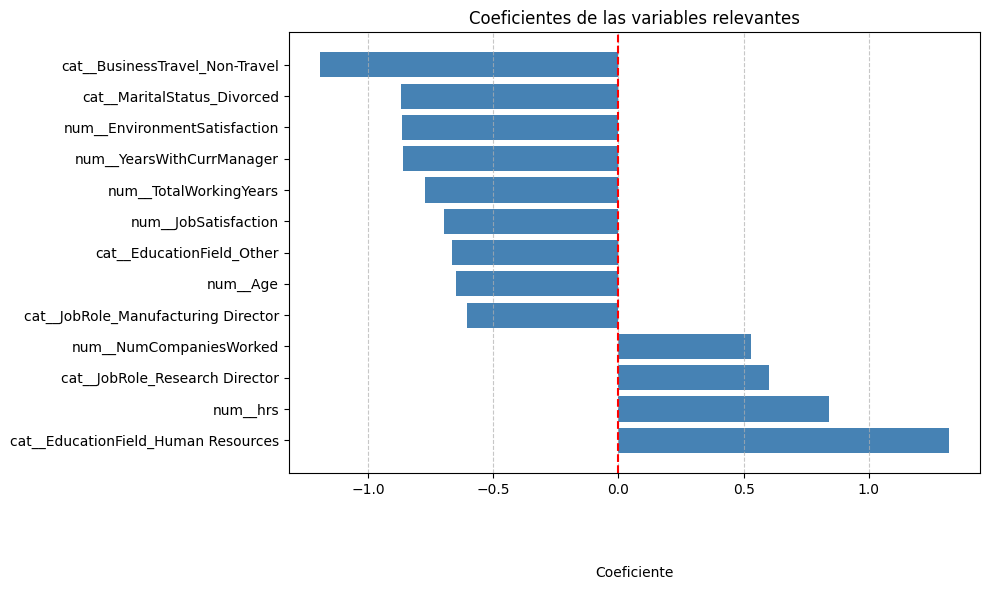

In [83]:
# Ordenamos el DataFrame por el coeficiente
df_resultado = df_resultado.sort_values(by='Coeficiente', ascending=False)

# Quitamos las variables irrelevantes
df_resultado_relevante = df_resultado[df_resultado['Relevante'] == True]

# Mostramos solo las variables relevantes mayores que 0,5 y menores que -0,5
df_resultado_relevante = df_resultado_relevante[(df_resultado_relevante['Coeficiente'] > 0.5) | (df_resultado_relevante['Coeficiente'] < -0.5)]

# Creamos el gráfico
plt.figure(figsize=(10, 6))
plt.barh(df_resultado_relevante['Variable'], df_resultado_relevante['Coeficiente'], color='steelblue')
plt.xlabel('Coeficiente', labelpad=50)
plt.title('Coeficientes de las variables relevantes')
plt.axvline(0, color='red', linestyle='--')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Gracias a este estudio, se comprueban qué variables del dataset influyen más.

## 6. Comparación de resultados y evaluación del modelo de entrenamiento

Una vez probados todos los modelos, se ponen en conjunto para comparar sus resultados y sacar conclusiones sobre cuál es el mejor clasificador e hiperparámetros a utilizar. Con los mejores resultados obtenidos, se crea el modelo a partir de la partición de entrenamiento, y mediante _cross validation_ __se obtiene una estimación pesimista del rendimiento a futuro del modelo__ usando la partición del test.

Finalmente, se entrenará el modelo con todo el dataset completo (entrenamiento + test) y se empleará para obtener predicciones de un conjunto de datos de competición más adelante.

### 6.1. Comparación de resultados

La siguiente ejecución imprime lo que se ha ido almacenando en el diccionario de resultados conforme se añadían los modelos creados y evaluados para obtener el clasificador y combinación de hiperparámetros que mejor generalizaba la partición de entrenamiento.

In [84]:
print("Resultados de los modelos:\n")
for nombre, resultado in resultados.items():
    print(f"Modelo: {nombre}")
    print(f"Puntuación: {resultado['puntuacion']}")
    print(f"Tiempo de ejecución: {resultado['tiempo_ejecucion']} segundos")
    if resultado['hiperparametros']:
        print(f"Hiperparámetros: {resultado['hiperparametros']}")
    print()

Resultados de los modelos:

Modelo: KNeighborsClassifier
Puntuación: 0.6089429107479649
Tiempo de ejecución: 0.08897876739501953 segundos

Modelo: DecisionTreeClassifier
Puntuación: 0.7513219652208821
Tiempo de ejecución: 0.11280250549316406 segundos

Modelo: KNeighborsClassifier_HPO
Puntuación: 0.6636557299012172
Tiempo de ejecución: 0.49481749534606934 segundos
Hiperparámetros: {'classifier__metric': 'manhattan', 'classifier__n_neighbors': 3}

Modelo: DecisionTreeClassifier_HPO
Puntuación: 0.7970763510474702
Tiempo de ejecución: 0.6346337795257568 segundos
Hiperparámetros: {'classifier__criterion': 'entropy', 'classifier__max_depth': 10, 'classifier__min_samples_split': 10}

Modelo: DummyClassifier
Puntuación: 0.5
Tiempo de ejecución: 0.016301393508911133 segundos

Modelo: LogisticRegression
Puntuación: 0.7354956696111931
Tiempo de ejecución: 0.10683083534240723 segundos

Modelo: LogisticRegression_Lasso
Puntuación: 0.7365780286357904
Tiempo de ejecución: 0.09426760673522949 segundos

Para apreciar esto de una manera mejor, se instancia un `DataFrame()` de la librería Pandas:

In [85]:
from IPython.display import display

# Configuramos pandas para mostrar todas las columnas
pd.set_option('display.max_colwidth', None)

# Convertimos el diccionario en un DataFrame
results_df = pd.DataFrame(resultados)

# Trasponemos el DataFrame para una mejor visualización, eliminamos la instancia del modelo
results_df = results_df.T.drop(columns=["modelo"])

results_df = results_df.sort_values(by="puntuacion", ascending=True)

# Mostramos la tabla
display(results_df)

,puntuacion,tiempo_ejecucion,hiperparametros
DummyClassifier,0.5,0.016301,None
KNeighborsClassifier,0.608943,0.088979,None
KNeighborsClassifier_HPO,0.663656,0.494817,"{'classifier__metric': 'manhattan', 'classifier__n_neighbors': 3}"
LogisticRegression,0.735496,0.106831,None
LogisticRegression_Lasso,0.736578,0.094268,None
LogisticRegression_Lasso_HPO,0.738082,2.096845,"{'classifier__C': 10, 'classifier__max_iter': 100}"
LogisticRegression_HPO,0.740068,0.371946,"{'classifier__C': 0.1, 'classifier__max_iter': 100}"
DecisionTreeClassifier,0.751322,0.112803,None
DecisionTreeClassifier_HPO,0.797076,0.634634,"{'classifier__criterion': 'entropy', 'classifier__max_depth': 10, 'classifier__min_samples_split': 10}"
SVC,0.810899,0.451896,None


Además, se muestra un gráfico de dispersión (_scatter plot_) donde se mide el `score` y el tiempo de ejecución en cada modelo de una manera mucho más visual.

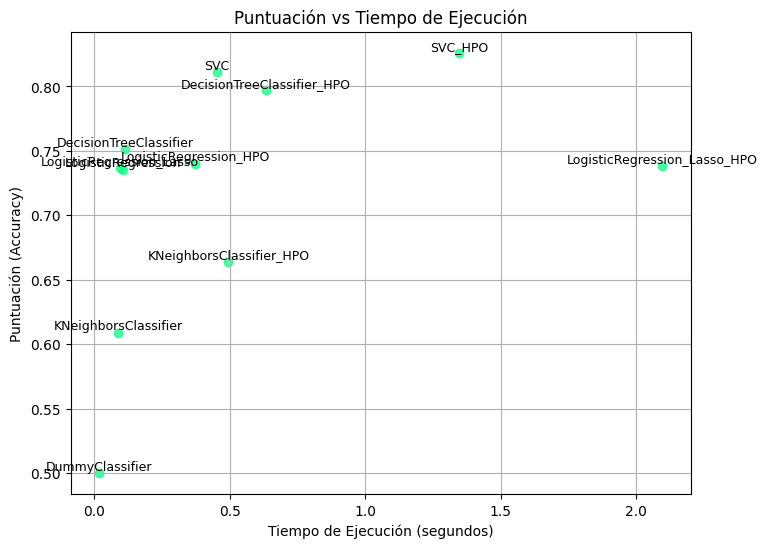

In [86]:
# Listamos los modelos de clasificación
modelos = list(resultados.keys())

# Extraemos puntuaciones y tiempos de ejecución para cada modelo
accuracies = [resultados[modelo]["puntuacion"] for modelo in modelos]
tiempos = [resultados[modelo]["tiempo_ejecucion"] for modelo in modelos]

# Creamos el gráfico de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(tiempos, accuracies, color='springgreen', alpha=0.7)
plt.title('Puntuación vs Tiempo de Ejecución')
plt.xlabel('Tiempo de Ejecución (segundos)')
plt.ylabel('Puntuación (Accuracy)')
plt.grid(True)

# Ajustamos la posición de las etiquetas de los puntos
for i, modelo in enumerate(modelos):
    plt.text(tiempos[i], accuracies[i], modelo, fontsize=9, ha='center', va='bottom')

# Mostramos el gráfico
plt.show()

Como se puede comprobar, el mejor clasificador obtenido es __SVM con ajuste de hiperparámetros__:

In [87]:
mejor_puntuacion = 0
mejor_modelo = None
tiempo_ejecucion = None
# Iteramos sobre los resultados para encontrar el mejor modelo
for nombre, resultado in resultados.items():
    if resultado['puntuacion'] > mejor_puntuacion:
        mejor_puntuacion = resultado['puntuacion']
        mejor_modelo = nombre
        tiempo_ejecucion = resultado['tiempo_ejecucion']

print(f"El mejor modelo es: {mejor_modelo} con una puntuación de {mejor_puntuacion} y tiempo de ejecución {tiempo_ejecucion}.")

El mejor modelo es: SVC_HPO con una puntuación de 0.8257544219638082 y tiempo de ejecución 1.347081184387207.


### 6.2. Estimación del rendimiento a futuro del modelo final

Finalmente, se realiza la evaluación _outer_ del modelo de clasificación elegido anteriormente. Para ello, se realiza una llamada a la función `predict()` para evaluar el modelo con la partición de test.

También es preciso investigar los __valores de TPR y TNR__ del modelo en las predicciones, para así especificar qué precisión tiene el modelo sobre cada clase. Para ello, instanciamos el método `confusion_matrix()` para medir estas métricas y realizar cálculos sencillos para obtener estos resultados:

In [88]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Importamos el mejor clasificador
mejor_clasificador = SVC(random_state=100495702)

# Balanceamos los pesos
mejor_clasificador.set_params(class_weight="balanced")

# Establecemos los hiperparámetros óptimos del clasificador SVM
mejor_clasificador.set_params(C=10, kernel='rbf')

# Creamos la pipeline con el preprocesador y el clasificador
pipeline = Pipeline(steps=[
           ("preprocessor", preprocesador),
           ("classifier", mejor_clasificador)
           ])

# Entrenamos el modelo con el conjunto de entrenamiento
pipeline.fit(X_train, y_train)

# Realizamos la predicción en el conjunto de test
score_test = pipeline.predict(X_test)
print(f"Score de la evaluación outer (conjunto de test): {accuracy_score(y_test, score_test)}")

# Calculamos la matriz de confusión y algunas métricas
tn, fp, fn, tp = confusion_matrix(y_test, score_test).ravel()
tpr = tp / (tp + fn)
tnr = tn / (tn + fp)
precision_pos = tp / (tp + fp)
precision_neg = tn / (tn + fn)
print("TPR (Recall):", tpr)
print("TNR:", tnr)
print("Precision Positiva:", precision_pos)
print("Precision Negativa:", precision_neg)

Score de la evaluación outer (conjunto de test): 0.9204081632653062
TPR (Recall): 0.7062146892655368
TNR: 0.9676214196762142
Precision Positiva: 0.8278145695364238
Precision Negativa: 0.9372738238841978


El resultado de la tasa de aciertos obtenida con el conjunto de evaluación es del __92,0481632653062%__. Esto hace ver que el modelo obtenido es eficiente y tiene un alto rendimiento.

Por otro lado, se obtienen los siguientes resultados a partir de la matriz de confusión:

- El __70,62%__ de las verdaderas clases positivas fueron correctamente identificadas (recall).
- El __96,76%__ de las verdaderas clases negativas fueron correcyamente identificadas. Esto quiere decir que el modelo casi nunca confunde una instancia negativa con una positiva.

En otras palabras, __el modelo es muy bueno identificando valores negativos, pero es menos sensible a los valores positivos__.

Finalmente, se estiman los valores de precisión del modelo para las diferentes clases:

- El __82,78%__ de los valores que se clasificaron como positivos realmente lo son.
- El __93,72%__ de los valores que se clasificaron como negativos realmente lo son.

Esto da una estimación del rendimiento a futuro del modelo, y se puede concluir lo mismo que antes; el modelo se centra más en clasificar correctamente las instancias de la clase negativa.

### 6.3. Entrenamiento del modelo final

Finalmente, se entrena el modelo final con el dataset completo (train + test), y se extrae al fichero [model.pkl](model.pkl) para su importación en el siguiente cuaderno.

In [89]:
import joblib
X_final = pd.concat([X_train, X_test])
y_final = pd.concat([y_train, y_test])


pipeline.fit(X_final, y_final)
joblib.dump(pipeline, "model.pkl")

print("Modelo final entrenado con todos los datos.")

Modelo final entrenado con todos los datos.


### 6.4. Obtención de predicciones (Notebook 2)

Este apartado es el que se realiza en el segundo notebook de la raíz, llamado [employee-attrition-competition](employee-attrition-competition.ipynb).

## 7. Tarea de elección abierta

Como tarea de elección abierta, propuesto en el enunciado de la práctica, se ha decidido la evaluación de un modelo de __clasificación RandomForest__ de la misma manera que se han hecho los anteriores. La elección de este clasificador no tiene otro objetivo adicional a conseguir un modelo más con el que comparar los anteriores.

### 7.1. Uso de RandomForest como clasificador

Para la creación de esta tarea, se importa la librería `RandomForestClassifier`:

In [90]:
from sklearn.ensemble import RandomForestClassifier

Los resultados de los modelos a comparar se almacenan en el siguiente diccionario:

In [91]:
# Creamos un diccionario para almacenar los resultados de los modelos
resultados_extra = {}

Una vez hecho esto, la tarea se centrará en la comparación de los tiempos de ejecución y scores obtenidos de los modelos simples (KNN y Árboles de Decisión) con éste:

In [92]:
# Definimos los clasificadores
clasificadores_extra = [KNeighborsClassifier(), DecisionTreeClassifier(random_state=100495702), RandomForestClassifier(random_state=100495702)]

# Iteramos sobre los clasificadores
for clasificador in clasificadores_extra:

    # Configuramos el clasificador para que use pesos balanceados cuando pueda
    if isinstance(clasificador, DecisionTreeClassifier):
           clasificador.set_params(class_weight="balanced")
    elif isinstance(clasificador, RandomForestClassifier):
           clasificador.set_params(class_weight="balanced")

    # Pipeline completo con clasificador
    pipeline = Pipeline(steps=[
           ("preprocessor", preprocesador),
           ("classifier", clasificador)
           ])

    # Medimos el tiempo de entrenamiento del modelo
    start_time = time.time()
    scores = cross_val_score(pipeline, X_train, y_train, cv=3, scoring='balanced_accuracy')
    end_time = time.time()

    # Imprimimos los resultados
    print("Modelo", clasificador.__class__.__name__)
    print("Puntuación de validación cruzada:", scores.mean())
    print("Tiempo de ejecución:", end_time - start_time, "segundos\n")

    # Almacenamos los resultados en el diccionario
    resultados_extra[clasificador.__class__.__name__] = {
       "modelo": clasificador,
       "puntuacion": scores.mean(),
       "tiempo_ejecucion": end_time - start_time,
       "hiperparametros": None
       }


Modelo KNeighborsClassifier
Puntuación de validación cruzada: 0.6089429107479649
Tiempo de ejecución: 0.10733485221862793 segundos

Modelo DecisionTreeClassifier
Puntuación de validación cruzada: 0.7513219652208821
Tiempo de ejecución: 0.15368032455444336 segundos

Modelo RandomForestClassifier
Puntuación de validación cruzada: 0.7323232323232324
Tiempo de ejecución: 0.8922438621520996 segundos



De la misma manera, se realiza el proceso con el ajuste de hiperparámetros (HPO) para cada modelo:

In [93]:
for clasificador in clasificadores_extra:

    # Definimos una pipeline con el preprocesador y el clasificador
    pipeline = Pipeline(steps=[
           ("preprocessor", preprocesador),
           ("classifier", clasificador)
           ])

    # Definimos la rejilla de hiperparámetros para cada clasificador
    if isinstance(clasificador, KNeighborsClassifier):
            param_grid = {
                'classifier__n_neighbors': [3, 5, 7, 9, 11],
                'classifier__metric': ['euclidean', 'manhattan', 'minkowski']
            }
    elif isinstance(clasificador, DecisionTreeClassifier):
            # Configuramos el clasificador para que use pesos balanceados si es un árbol de decisión
            clasificador.set_params(class_weight="balanced")
            param_grid = {
                'classifier__max_depth': [5, 10, 15, None],
                'classifier__min_samples_split': [2, 5, 10],
                'classifier__criterion': ['gini', 'entropy'],
            }
    elif isinstance(clasificador, RandomForestClassifier):
            # Configuramos el clasificador para que use pesos balanceados si es un RandomForestClassifier
            clasificador.set_params(class_weight="balanced")
            param_grid = {
                'classifier__max_depth': [5, 10, 15, None],
                'classifier__min_samples_split': [2, 5, 10],
                'classifier__criterion': ['gini', 'entropy'],
            }

    # Entrenamos el modelo con GridSearchCV para encontrar los mejores hiperparámetros
    grid_search = GridSearchCV(pipeline, param_grid, cv=3, n_jobs=-1, scoring='balanced_accuracy')

    # Medimos el tiempo del entrenamiento del modelo
    start_time = time.time()
    grid_search.fit(X_train, y_train)
    end_time = time.time()

    # Mostrar los mejores hiperparámetros
    print("Modelo", clasificador.__class__.__name__, "con HPO")
    print("Mejores parámetros:", grid_search.best_params_)
    print("Mejor puntuación:", grid_search.best_score_)
    print("Tiempo de ejecución:", end_time - start_time, "segundos\n")

    # Guardamos el mejor modelo en la instancia del diccionario con HPO
    resultados_extra[clasificador.__class__.__name__+"_HPO"] = {
        "modelo": clasificador,
        "puntuacion": grid_search.best_score_,
        "tiempo_ejecucion": end_time - start_time,
        "hiperparametros": grid_search.best_params_
    }

Modelo KNeighborsClassifier con HPO
Mejores parámetros: {'classifier__metric': 'manhattan', 'classifier__n_neighbors': 3}
Mejor puntuación: 0.6636557299012172
Tiempo de ejecución: 0.7643289566040039 segundos

Modelo DecisionTreeClassifier con HPO
Mejores parámetros: {'classifier__criterion': 'entropy', 'classifier__max_depth': 10, 'classifier__min_samples_split': 10}
Mejor puntuación: 0.7970763510474702
Tiempo de ejecución: 1.2904081344604492 segundos

Modelo RandomForestClassifier con HPO
Mejores parámetros: {'classifier__criterion': 'entropy', 'classifier__max_depth': 5, 'classifier__min_samples_split': 5}
Mejor puntuación: 0.7771722658004245
Tiempo de ejecución: 9.399640321731567 segundos



### 7.2. Evaluación de resultados

Se observa que los valores de los mejores hiperparámetros para KNN y árboles de decisión se mantienen igual que en apartados anteriores. No obstante, la puntuación y tiempo de ejecución obtenidos para el clasificador `RandomForest()` no mejoran los resultados.

A continuación, se muestra un plot que resumirá la tarea:

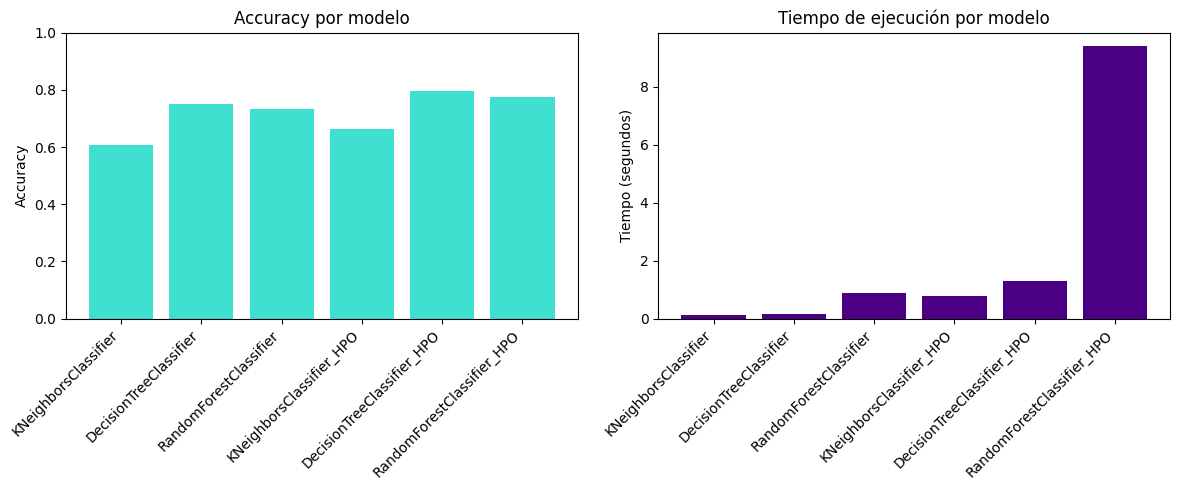

In [94]:
# Listamos los modelos creados
modelos = list(resultados_extra.keys())

# Extraemos las puntuaciones y tiempos de ejecución de cada modelo
accuracies = [resultados_extra[modelo]["puntuacion"] for modelo in modelos]
tiempos = [resultados_extra[modelo]["tiempo_ejecucion"] for modelo in modelos]

# Creamos dos plots: uno para la accuracy y otro para el tiempo de ejecución
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot de scores (accuracies)
axes[0].bar(modelos, accuracies, color='turquoise')
axes[0].set_title('Accuracy por modelo')
axes[0].set_ylabel('Accuracy')
axes[0].set_ylim(0, 1)

# Plot de tiempo de ejecución
axes[1].bar(modelos, tiempos, color='indigo')
axes[1].set_title('Tiempo de ejecución por modelo')
axes[1].set_ylabel('Tiempo (segundos)')

# Ajustamos las etiquetas de los modelos
for ax in axes:
    ax.set_xticks(range(len(modelos)))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Mostramos los plots
plt.tight_layout()
plt.show()

La tarea ha resultado ser ineficiente, ya que el modelo de clasificación RandomForest no mejora a los modelos de clasificación simple (y mucho menos mejorará al mejor modelo elegido). Por lo tanto, la tarea adicional acaba aquí.

In [95]:
print("Resultados de los modelos:\n")
for nombre, resultado in resultados_extra.items():
    print(f"Modelo: {nombre}")
    print(f"Puntuación: {resultado['puntuacion']}")
    print(f"Tiempo de ejecución: {resultado['tiempo_ejecucion']} segundos")
    if resultado['hiperparametros']:
        print(f"Hiperparámetros: {resultado['hiperparametros']}")
    print()

Resultados de los modelos:

Modelo: KNeighborsClassifier
Puntuación: 0.6089429107479649
Tiempo de ejecución: 0.10733485221862793 segundos

Modelo: DecisionTreeClassifier
Puntuación: 0.7513219652208821
Tiempo de ejecución: 0.15368032455444336 segundos

Modelo: RandomForestClassifier
Puntuación: 0.7323232323232324
Tiempo de ejecución: 0.8922438621520996 segundos

Modelo: KNeighborsClassifier_HPO
Puntuación: 0.6636557299012172
Tiempo de ejecución: 0.7643289566040039 segundos
Hiperparámetros: {'classifier__metric': 'manhattan', 'classifier__n_neighbors': 3}

Modelo: DecisionTreeClassifier_HPO
Puntuación: 0.7970763510474702
Tiempo de ejecución: 1.2904081344604492 segundos
Hiperparámetros: {'classifier__criterion': 'entropy', 'classifier__max_depth': 10, 'classifier__min_samples_split': 10}

Modelo: RandomForestClassifier_HPO
Puntuación: 0.7771722658004245
Tiempo de ejecución: 9.399640321731567 segundos
Hiperparámetros: {'classifier__criterion': 'entropy', 'classifier__max_depth': 5, 'classi

## 8. Conclusiones

### 8.1. Declaración de uso de IA

El uso de IA (principalmente __ChatGPT__ y __GitHub Copilot__) ha sido especialmente útil en ciertos aspectos del proyecto. Los casos donde se ha utilizado son los siguientes:

- Ayuda inicial sobre lenguaje Markdown y sintaxis.
- Depuración de errores de código relacionado con la librería `sklearn`.
- Creación de gráficos, plots y tablas acerca de los resultados; ajuste de escalas para mostrar los resultados de manera clara.

Sin embargo, la [referencia de la API sklearn](https://scikit-learn.org/stable/api/index.html) ha resultado ser una guía espléndida y más reveladora que las tecnologías anteriores para la realización de éste proyecto.

### 8.2. Valoración del trabajo realizado y conclusiones

Los resultados obtenidos son gratificantes, y se cree que el trabajo realizado se ajusta a lo pedido por el enunciado. Se concluye en que el trabajo ha sido efectivo, correcto e inspirador de cara a los conocimientos sobre el curso.

Gracias al trabajo realizado se ha conseguido comprender de otra manera cómo funciona la rama de Machine Learning y entrenamiento de modelos de una manera menos teórica.